# Rješavanje jednadžbi za dobivanje prijenosne funkcije

U ovom poglavlju biti će opisano rješavanje linearnih jednadžbi supstitucijom, rješavanje sustava linearnih jednadžbi te supstitucije varijabli.

Da bi smo dobili prijenosnu funkciju sustava potrebno je rješiti sustav jednadžbi koje definiraju sustav, u elektrotehnici su to npr. jednadžbe dobivene metodom konturnih struji, napona čvorova ili nekom metodom koja opisuje strujno-naponske zavisnosti unutar sustava.

Rješavanju jednadžbi potrebno je pristupiti analitički, te standardnim postupcima supstitucije doći do rješenja.

Python funkcije koje se koriste za ove operacije dio su ```Sympy``` knjižnice.
```python
* Eq
* symbols
* Function
* sympy.solvers solve
```

Za početak potrebno je obrisati sve varijable iz memorije.

In [1]:
import os
clear = lambda: os.system('cls')
clear()

0

Potom importati sve funkcije koje koristimo.

In [2]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)

from sympy import Eq, symbols, Function
from sympy.solvers import solve

### Primjer: Linearni električni sustav (Izvor: N.Stojkovic, N.Mijat - Teorija mreža i linija (Zbirka zadataka), zadatak 3.05.)

Za početak je potrebno definirati sva imena matematičkih varijabli koje koristimo kao Sympy simbole.

In [3]:
Uul, Uiz = symbols('Uul Uiz')
Z1, Z2 = symbols('Z1 Z2')
I1, I2 = symbols('I1 I2')
r = symbols('r')
Tf = symbols('Tf')
s = symbols('s')
L1, L2 = symbols('L1 L2')

1.) Postavimo jednadžbe koje opisuju sustav.

In [4]:
eq = Eq(Uul, I2*Z1 + Uiz + I2*Z2)
display(eq)

In [5]:
i2 = (1/r) * Uul
print('I2 =')
display(i2)

I2 =


Za supstituiranje I2 u gornjoj jednadžbi s izrazom za I2 potrebno je koristiti funkciju ```.subs()```

Funkcija ```.subs()``` kao argument ima varijablu koju supstituiramo te izraz koji unosi ta supstitucija.
Simbol (Matematicka varijabla) i python varijabla ne smiju imati isto ime, no ukoliko nam je simbol ```I2```, a python varijabla ```i2``` tada možemo supstituirati simbol s izrazom za ```I2``` koji je spremljen kao python varijabla ```i2```.
Iz tog razloga je gornja jednadžba zapisana kao ```i2=...``` a ne ```I2=...```.

```.subs(VARIJABLA, IZRAZ)```, u ovom slučaju:

In [6]:
eq = eq.subs(I2, i2)
display(eq)

Isto smo mogli napraviti s:

```python
eq = eq.subs(I2, (1/r) * Uul)
```


jer je u memoriji računala (1/r) * Uul spremljeno kao i2.

Sada kada smo dobili izraz iz kojeg mozemo izlučiti ```Uul``` te ```Uiz```, samim time dobiti prijenosnu funkciju ```Tf = Uiz/Uul``` potrebno je rješiti jednadžbu za varijablu ```Uul``` uz pomoć funkcije ```solve()```, to će nam dati izraz u obliku ```Uul = ...```

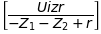

In [7]:
Uul = solve(eq, Uul)
display(Uul)

Vidimo da je zapis u obliku matrice, s matricom ne možemo raditi daljnje potrebne operacije stoga je potrebno izvući izraz iz matrice i spremiti ga u "običnu" varijablu.  
S obzirom da smo jednadžbu rješili samo za jednu varijablu, rezultat je izražen kao samo jedno polje te je dovoljno napraviti sljedeće:

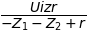

In [8]:
Uul = Uul[0]
display(Uul)

Sada kada imamo definiran izraz za ```Uul``` možemo jednostavno definirati ```Tf``` kao ```Uiz/Uul``` te dobiti prijenosnu funkciju.

In [9]:
Tf = Uiz/Uul
display(Tf)

```Z1``` i ```Z2``` možemo supstituirati kao ```sL1``` i ```sL2``` putem funkcije ```.subs()``` kao u ranijem koraku.

In [10]:
Tf = Tf.subs(Z1, s*L1)
Tf = Tf.subs(Z2, s*L2)
display(Tf)

Potom vrijednosti ```L1```, ```L2``` i ```r``` možemo unositi istim postupkom supstitucije, npr. ```L1=2```, ```L2=3```, ```r=1/2```

In [11]:
Tf = Tf.subs(L1, 2)
Tf = Tf.subs(L2, 3)
Tf = Tf.subs(r, 1/2)
display(Tf)

Isto smo mogli napraviti na način:
```python
l1 = 2
l2 = 3
R = 1/2
Tf = Tf.subs(L1, l1)
Tf = Tf.subs(L2, l2)
Tf = Tf.subs(r, R)
display(Tf)
```

### Primjer: Linearni električni sustav (Izvor: N.Stojkovic, N.Mijat - Teorija mreža i linija (Zbirka zadataka), zadatak 3.12.)

In [12]:
import os
clear = lambda: os.system('cls')
clear()

In [13]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)

from sympy import Eq, symbols, Function
from sympy.solvers import solve
import sympy as sp

In [14]:
U1, U2 = symbols('U1 U2')
Uiz, Uul = symbols('Uiz Uul')
I1, I2 = symbols('I1 I2')
Tf = symbols('Tf')
s = symbols('s')
R1, R2, L, C = symbols('R1 R2 L C')

1) Definiramo jednadžbe

In [15]:
eq1 = Eq(U1 * ((1/(s*L))+s*C) - Uul*(1/(s*L)), 0)
eq2 = Eq(U2 * ((1/R1)+(1/R2)) - Uiz*(1/R1), 0)

display(eq1)
display(eq2)

Po definiciji operacijskog pojačala ```Uiz=A(U1-U2)```, gdje A teži ka beskonačno dolazimo do izraza ```U1=U2```  
U idućem koraku rješimo gornje jednadžbe za varijable ```U1``` i ```U2```.

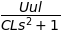

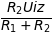

In [16]:
u1 = solve(eq1, U1)
u2 = solve(eq2, U2)
u1 = u1[0]
u2 = u2[0]
display(u1)
display(u2)

Vratimo se na definiciju ```U1 = U2```

In [17]:
eq3 = Eq(U1, U2)
display(eq3)

Te uvrstimo supstituciju s gore dobivenim izrazima za ```U1``` i ```U2```

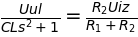

In [18]:
eq3 = eq3.subs(U1, u1)
eq3 = eq3.subs(U2, u2)
display(eq3)

Potom rješimo jednadžbu za varijablu ```Uiz``` te podijelimo s ```Uul```.

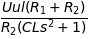

In [19]:
tf = solve(eq3, Uiz)
tf = tf[0]
display(tf)

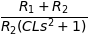

In [20]:
tf = tf/Uul
display(tf)

Uvrstimo zadane vrijednosti parametara te supstituiramo.

In [21]:
r1 = 9
r2 = 1
l = 2
c = 1

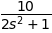

In [22]:
tf = tf.subs(R1, r1)
tf = tf.subs(R2, r2)
tf = tf.subs(L, l)
tf = tf.subs(C, c)
display(tf)